# Reverse-engineer descriptions of top wines

Use a naive bases binomial classifier to work out which words in descriptions are associated with high-scoring wines. We can then construct our own descriptions for high-scoring wines and see what our model would predict the scores to be.

## Use wine description to predict score

In [11]:
# Compute word counts
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train['description'])
X_test_vec = vectorizer.transform(X_test['description'])

             precision    recall  f1-score   support

          0       0.86      0.82      0.84     60658
          1       0.72      0.78      0.75     36820

avg / total       0.81      0.80      0.81     97478

Area under ROC: 0.882017501387


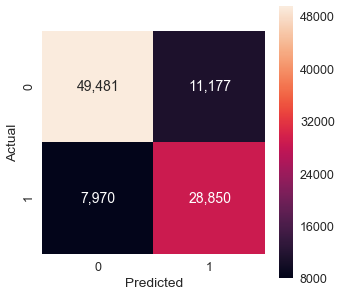

In [12]:
# Fit a naive bayes model to the training data.
nb_classifier = MultinomialNB()
model_results_cv(X_train_vec, y_train, nb_classifier)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

             precision    recall  f1-score   support

          0       0.86      0.82      0.84     20268
          1       0.72      0.79      0.75     12225

avg / total       0.81      0.81      0.81     32493

Area under ROC: 0.883305043703


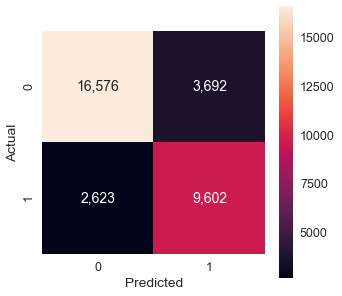

In [13]:
nb_classifier.fit(X_train_vec, y_train)
y_predict = nb_classifier.predict(X_test_vec)
y_predict_proba = nb_classifier.predict_proba(X_test_vec)
model_results(y_test, y_predict, y_predict_proba)

In [38]:
pd.DataFrame({'y_predict': y_predict, 
              'y_predict_proba': y_predict_proba[:, 0]})

,y_predict,y_predict_proba
0,0,1.000000e+00
1,1,1.044344e-02
2,0,9.983053e-01
3,1,4.211216e-01
4,0,9.501149e-01
5,0,9.998989e-01
6,0,9.756564e-01
7,0,8.304256e-01
8,0,7.174586e-01
9,0,9.997202e-01


In [53]:
y_test.head()

70354     0
4473      1
59653     0
107856    1
64547     0
Name: excellent+, dtype: int64

In [15]:
incorrectly_classified_idx = (y_test != y_predict).tolist()
incorrectly_classified = pd.concat([X_test.reset_index(), 
                                    y_test.reset_index(),
                                   pd.DataFrame({'y_predict': y_predict,
                                                 'y_predict_proba': y_predict_proba[:, 1]})],
                                  axis = 1)[incorrectly_classified_idx]

In [ ]:
incorrectly_classified.head()